# Consolidated workflow

Import initial libraries and data file. N.B. The data already had season_recorded added as a composite variable, by me, earlier.

In [28]:
# import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# check select_data
df = pd.read_csv('/Users/RAhmed/data store/Wesleyan_Capstone/select_data.csv')
df.shape

(59400, 23)

## Get rid of NaNs

In [9]:
# check which column has NaNs
df.isna().any()

id                       False
date_recorded            False
season_recorded          False
gps_height               False
installer                 True
longitude                False
latitude                 False
basin                    False
region_code              False
population               False
public_meeting            True
scheme_management         True
permit                    True
construction_year        False
extraction_type_group    False
management_group         False
payment_type             False
water_quality            False
quantity_group           False
source_type              False
source_class             False
waterpoint_type_group    False
status_group             False
dtype: bool

In [10]:
df['installer'].isnull().sum()

3655

In [11]:
df['public_meeting'].isnull().sum()

3334

In [12]:
df['scheme_management'].isnull().sum()

3877

In [13]:
df['permit'].isnull().sum()

3056

There are relatively a lot of NaNs in public_meeting so ignoring these will remove valuable info. Also, the test set is likely to have NaNs, so we need to come up with consistent treatment that will also be used on the test set. For all of these I will turn NaN into 'unknown'.

N.B. That booleans need to be treated differently, as you cannot mix True, False and 'unknown'.

In [14]:
# fix df['installer']. N.B. Was already one 'unknown', adding more where no entry
df['installer'].fillna(value='unknown', inplace=True)
print('unknown' in df.installer.unique())
print(df['installer'].isnull().sum())
print((df['installer'] == 'unknown').sum())

True
0
3656


In [15]:
# situation for df['public_meeting']
print('missing entries', df['public_meeting'].isnull().sum())
print(df['public_meeting'].value_counts())

missing entries 3334
True     51011
False     5055
Name: public_meeting, dtype: int64


In [16]:
# function to correct boolean variable with missing entries
def bool_converter(bool):
    if bool == False:
        return 0
    elif bool == True:
        return 1
    else: 
        return 2

In [17]:
# fix df['public_meeting']
df['public_meeting'] = df['public_meeting'].apply(bool_converter)
print(df['public_meeting'].value_counts())

1    51011
0     5055
2     3334
Name: public_meeting, dtype: int64


In [18]:
# fix df['scheme_management'], is non-boolean
df['scheme_management'].fillna(value='unknown', inplace=True)
print('unknown' in df.scheme_management.unique())
print(df['scheme_management'].isnull().sum())
print((df['scheme_management'] == 'unknown').sum())

True
0
3877


In [19]:
# fix df['permit'], is boolean
df['permit'] = df['permit'].apply(bool_converter)
print(df['permit'].value_counts())

1    38852
0    17492
2     3056
Name: permit, dtype: int64


## EDA: initial look at variables

Explore using Roland Jeannier's function

In [20]:
def eda_helper(df):
   dict_list = []
   for col in df.columns:
       data = df[col]
       dict_ = {}
       # The null count for a column. 
       dict_.update({"null_count" : data.isnull().sum()})
       # Counting the unique values in a column
       dict_.update({"unique_count" : len(data.unique())})
       # Finding the types of data in the column
       # This is useful for finding out potential problems with type mismatches
       dict_.update({"data_type" : set([type(d).__name__ for d in data])})
       #dict_.update({"score" : match[1]})
       dict_list.append(dict_)
   eda_df = pd.DataFrame(dict_list)
   eda_df.index = df.columns
   eda_df.sort_values(by=['null_count', 'unique_count'], ascending=[True, False], inplace=True)
       
   return eda_df

In [21]:
print(eda_helper(df))

                      data_type  null_count  unique_count
id                        {int}           0         59400
latitude                {float}           0         57517
longitude               {float}           0         57516
gps_height                {int}           0          2428
installer                 {str}           0          2145
population                {int}           0          1049
date_recorded             {str}           0           356
construction_year         {int}           0            55
region_code               {int}           0            27
scheme_management         {str}           0            13
extraction_type_group     {str}           0            13
basin                     {str}           0             9
water_quality             {str}           0             8
payment_type              {str}           0             7
source_type               {str}           0             7
waterpoint_type_group     {str}           0             6
management_gro

^ above all looks as it should.

### Long look at installer

In [32]:
df['installer'].nunique()

2145

There are a lot of installers!!! Let's look at some of them to get an idea.

In [33]:
df['installer'].value_counts()

DWE                             17402
unknown                          3656
Government                       1825
RWE                              1206
Commu                            1060
DANIDA                           1050
KKKT                              898
Hesawa                            840
0                                 777
TCRS                              707
Central government                622
CES                               610
Community                         553
DANID                             552
District Council                  551
HESAWA                            539
World vision                      408
LGA                               408
WEDECO                            397
TASAF                             396
District council                  392
Gover                             383
AMREF                             329
TWESA                             316
WU                                301
Dmdd                              287
ACRA        

Make the list alphabetical.

In [34]:
# create an alphabetical list of installers and take a look
temp1 = {}
for k, v in df['installer'].value_counts().items():
    temp1.update({k:v})
sort_dict = sorted(temp1.items(), key=lambda x: x[0], reverse=False)
sort_dict[:50]

[('-', 3),
 ('0', 777),
 ('A.D.B', 1),
 ('AAR', 4),
 ('ABASIA', 29),
 ('ABD', 1),
 ('ABDALA', 1),
 ('ABDUL', 1),
 ('AC', 2),
 ('ACORD', 3),
 ('ACRA', 278),
 ('ACT', 1),
 ('ACT MARA', 1),
 ('ACTION AID', 1),
 ('ACTIVE TANK CO', 9),
 ('ACTIVE TANK CO LTD', 2),
 ('AD', 14),
 ('ADAP', 4),
 ('ADB', 5),
 ('ADP', 19),
 ('ADP Busangi', 14),
 ('ADRA', 55),
 ('ADRA /Government', 6),
 ('ADRA/Government', 3),
 ('AF', 4),
 ('AFRICA', 2),
 ('AFRICA MUSLIM', 1),
 ('AFRICAN DEVELOPMENT FOUNDATION', 6),
 ('AFRICAN REFLECTIONS FOUNDATION', 1),
 ('AGRICAN', 1),
 ('AI', 11),
 ('AIC', 10),
 ('AIC KI', 1),
 ('AICT', 84),
 ('AIMGOLD', 9),
 ('AIXOS', 1),
 ('ALIA', 1),
 ('ALLYS', 1),
 ('AMP Contract', 6),
 ('AMP Contracts', 6),
 ('AMP contractor', 9),
 ('AMREF', 329),
 ('ANGLI', 5),
 ('ANGLIKANA CHURCH', 1),
 ('ANGRIKANA', 7),
 ('ANSWAR', 1),
 ('APM', 2),
 ('AQAL', 2),
 ('AQUA BLUES ANGELS', 1),
 ('AQUA WEL', 1)]

There is clear duplicaton due to mis-spellings, abbreviations and different capitalisation, etc.  Fix this by putting related/same installers into a  dictionary and allocate each installer against the new dictionary.

In [35]:
# create installer dictionary
installer_dict = {'ACTIVE TANK CO LTD': {'ACTIVE TANK CO LTD','ACTIVE TANK CO'},
                  'ADP': {'ADP', 'ADP Busangi'},
                  'ADRA': {'ADRA', 'ADRA /Government', 'ADRA/Government','Adra','Adra /Community',
                           'Adra/ Community', 'Adra/Community', 'Adrs'},
                  'AFRICA MUSLIM': {'AFRICA MUSLIM', 'Africa Islamic Agency Tanzania'},
                  'ACTION AID': {'ACTION AID', 'Action Aid'},
                  'AI': {'AI','AIC', 'AIC KI','AICT'},
                  'AMP Contract': {'AMP Contract', 'AMP Contracts','AMP contractor'},
                  'AFRICAN DEVELOPMENT FOUNDATION': {'AFRICAN DEVELOPMENT FOUNDATION', 
                                                     'AFRICAN REFLECTIONS FOUNDATION', 'AGRICAN'},
                  'Anglican Church': {'Anglican Church', 'ANGLIKANA CHURCH', 'ANGLI', 'ANGRIKANA', 'Angli', 
                                      'Anglican', 'Anglican Uganda', 'Anglican church', 'Anglikan',
                                      'Anglikana', 'Angrikana', 'Chur', 'Church', 'CHRISTIAN OUTRICH', 
                                      'anglican Uganda'},
                  'AQUA BLUES ANGELS': {'AQUA BLUES ANGELS', 'AQUA WEL', 'AQUA Wat', 'AQUA Wel'},
                  'Action Contre La Faim': {'Action Contre La Faim', 'Action Contre la Faim'},
                  'Active MKM': { 'Active MKM', 'Active KMK'},
                  'Africaone': {'Africaone', 'Africaone Ltd'},
                  'Amboni Plantation': {'Amboni Plantation', 'Amboni plantation'},
                  'American': {'American', 'Amec','Amref', 'Amec', 'USAID', 'US Embassy', 
                               'USA EMBASSY', 'USAID', 'U.S.A'},
                  'Arab Community': {'Arab Community', 'Arab community'},
                  'Ardhi': {'Ardhi Instute', 'Ardhi Water Wells', 'Ardhi and PET Companies', 'Ardhi water well'},
                  'CARITAS': {'CARITAS', 'CARTAS', 'CARTAS Tanzania'},
                  'Colonial Government': {'Colonial Government', 'British colonial government'},
                  'Community': {'Community','Commu', 'Communit', 'Comunity','COMMU', 'COMMUNITY'},
                  'Concern': {'Concern', 'Conce', 'Concen', 'Concern /government', 'Concern/Government'},
                  'Consultant': {'Consultant', 'Consultant Engineer', 'Consultant and DWE',
                                'Consulting Engineer', 'Consulting engineer', 'Consuting Engineer'},
                  'Cosmo': {'Cosmo', 'Cosmos Engineering'},
                  'Council': {'Council', 'Counc', 'DISTRICT COUNCIL', 'District  Council','District Counci',
                              'District Council', 'District council', 'Distri', 'Municipal', 'Municipal Council'},
                  'Artisan': {'Arisan', 'Arian', 'Artisan', 'Aartisa', 'Atisan'}, 
                  'Babu Sajini': {'Babu Sajini', 'Babu Sajin'},
                  'China': {'CHINA', 'CHINA HENAN CONTRACTOR'},
                  'CJEJOW': {'CJEJOW', 'CJEJ0', 'CJEJOW CONSTRUCTION'},
                  'Concern': {'Concern', 'Concen'},
                  'DANIDA' : {'DANIDA','DANIAD', 'DANID','DANIDS'},
                  'DASIP' : {'DASIP', 'DASP', 'DASSIP'},
                  'DBSPE': {'DBSPE', 'DBSP'},
                  'DW': {'DW', 'DW#', 'DWE & LWI', 'DWR', 'DWW', 'DWE', 'DWE/','DWE}', 'District Water Department',
                         'District water depar', 'District water department', 'District Water Department', 
                         'Distric Water Department', 'District water department', 'Water Authority', 'Water boards',
                         'water board', 'Water board', 'Water department', 'WB','WB / District Council'},
                  'Dr. Matobola': {'Dr. Matobola', 'Dr.Matobola'},
                  'Dr. Matomola': {'Dr. Matomola','Dr.Matomola'},
                  'EL': {'EL', 'ELCT'},
                  'Egypt': {'People from Egypt', 'Tanz Egypt technical coopera', 'Tanzania/ Egypt', 
                            'Wizra ya maji na egypt', 'Tanz Egypt technical coopera',
                            'Tanz/Egypt technical coopera', 'Tanzania Egypt Technical Co Op', 
                            'REGWA COMPANY OF EGPTY', 'REGWA COMPANY OF EGYPT'},
                  'Fin Water': {'Fin Water', 'F', 'FIN WATER', 'FINI WATER', 'FINI Water','FW', 
                                'Fin water', 'FinW','FinWate','FinWater', 'Fini Water', 
                                'Fini water', 'Finland Government', 'Finwater', 'FINLAND','FINN WATER'},
                  'Germany' : {'Germany', 'german', 'germany', 'THREE WAY GERMAN'},
                  'Government': {'Government', 'GOVERNMENT', 'Government and Community', 'CENTRAL GOVERNMENT',
                                 'Cebtral Government', 'Cental Government', 'Centr', 'Central govt', 'Centra govt',
                                 'Central government', 'GOVER', 'GOVERM', 'GOVERN', 'GOVERNME', 
                                 'Wizara  ya maji', 'Wizara ya maji', 'wizara ya maji', 'MW', 
                                 'TANZANIAN GOVERNMENT', 'Cetral government /RC', 'Tansi', 'Tanz',
                                 'Tanza', 'Tanzania', 'Tanzanian Government', 
                                 'Tanzania Government', 'Tanzania government','Ministry of water', 
                                 'Ministry of water engineer'
                                },
                  'GREINAKER': {'GREINAKER', 'GREINEKER'},
                  'GRA' : {'GRA','GRA TZ MUSOMA'},
                  'GRUMETI':{'GRUMETI', 'GRUMET', 'GRUMETI SINGITA', 'GURUMETI SAGITA CO'},
                  'Grobal resource alliance': {'Grobal resource alliance', 'Grobal resource  alliance'},
                  'Gwasco': {'Gwasco', 'Gwasco L','Gwaseco'},
                  'HAPA': {'HAPA', 'HAPA SINGIDA'},
                  'Hesawa': {'Hesawa', 'HESAWA', 'Hasawa','Hesawz', 'Hesewa'},
                  'Individuals': {'Individuals', 'INDIVIDUALS', 'INDIVIDUAL'},
                  'India': {'India', 'Indi'},
                  'Institution': {'Institution', 'Insititutiona'},
                  'Islamic': {'Islamic', 'Africa Islamic Agency Tanzania', 'Africa M', 'Africa Muslim Agenc',
                              'African Muslims Age', 'African Realief Committe of Ku', 'Kuwait', 'KUWAIT', 'Mosque',
                              'Muslims', 'Muslimu Society(Shia)', 'MUSLIMEHEFEN INTERNATIONAL'},
                  'ISF': {'ISF', 'ISF/Government', 'ISF/TACARE'},
                  'Japan Government': {'Japan Government', 'JAPAN EMBASSY', 'JICA','JAICA', 'Jaica', 'JSICA','Jika'
                                      'JAICA CO', 'Embasy of Japan in Tanzania'},
                  'Jeshi la Wokovu': {'Jeshi la Wokovu', 'Jeshi la wokovu', 'Jeshi la wokovu [cida]'},
                  'JUIN': {'JUIN', 'JUIN CO'},
                  'KARUMBA BUILDING COMPANY LTD': {'KARUMBA BUILDING COMPANY LTD', 'KARUMBA BIULDIN',
                                                  'KARUMBA BIULDING COMPANY LTD','KARUMBA BIULDING CONTRACTOR'},
                  'Kilwa company': {'Kilwa company', 'Kilwater', 'Kiliwater'},
                  'KKKT': {'KKKT', 'KK', 'KKKT CHURCH', 'KKKT DME', 'KKKT _ Konde and DWE', 'KKKT-Dioces ya Pare',
                           'KKT', 'KKT C'},
                  'KOBERG': {'KOBERG', 'KOBERG Contractor'},
                  'KYASHA ENTERPR': {'KYASHA ENTERPR', 'KYASHA ENTREPR'},
                  'Lawate fuka water su': {'Lawate fuka water su', 'Lawatefuka water sup'},
                  'Local': {'Local', 'Local  technician', 'Local te', 'Local technical tec', 'Local technician', 
                           'Locall technician'},
                  'LWI': {'LWI', 'LWI &CENTRAL GOVERNMENT'},
                  'Magadini-Makiwaru wa': {'Magadini-Makiwaru wa', 'Magadini Makiwaru wa'},
                  'MACK DONALD CO LTD': {'MACK DONALD CO LTD','MACK DONALD CONTRACTOR', 'MACK DONALD CONTRSCTOR'},
                  'Maswi': {'Maswi', 'Maswi Company', 'Maswi company', 'Maswi drilling co ltd'},
                  'MKONGO CONSTRUCTION': {'MKONGO CONSTRUCTION', 'MKON CONSTRUCTION', 'MKONG CONSTRUCTION',
                                         'MKONGO BUILDING CONTRACTOR'},
                  'MLAKI  CO': {'MLAKI  CO', 'MLAKI CO'},
                  'Mombo urban water': {'Mombo urban water', 'Mombo urban  water', 'Mombo urban water s'},
                  'MTUWASA': {'MTUWASA', 'MTUWASA and Community'},
                  'MWAKI CONTRACTOR': {'MWAKI CONTRACTOR', 'MWAKI CONTRACTO'},
                  'Makonde': {'Makonde', 'Makonde water Population', 'Makonde water population','Makonde water supply'},
                  'Maswi company': {'Maswi company', 'Maswi'},
                  'Milenium': {'Milenium','Milenia', 'Mileniam', 'Mileniam project'},
                  'Magadini Makiwaru wa': {'Magadini Makiwaru wa', 'Magadini-Makiwaru wa'},
                  'Moravian': {'Moravian', 'Morovi', 'Morovian Church', 'Morovian church', 'Morrov', 'Morrovian'},
                  'MWE' : {'MWE', 'MWE &'},
                  'MTUWASA': {'MTUWASA','MTUWASA and Community', 'MUWASA','MUWSA'},
                  'NYAKILANGANI': {'NYAKILANGANI', 'NYAKILANGANI  CO','NYAKILANGANI CO', 
                                   'NYAKILANGANI CONSTRUCTION', 'Nyakilanganyi'},
                  'Oikos E .Africa': {'Oikos E Africa', 'Oikos E Africa','Oikos E Africa', 'Oikos E. Africa', 
                                      'Oikos E.Africa','Oikos E.Afrika'},
                  'OXFAM': {'OXFAM', 'OXFARM'},
                  'NORAD': {'NORAD', 'NIRAD', 'NORA'},
                  'NYAKILANGANI': {'NYAKILANGANI', 'NYAKILANGANI CO', 'NYAKILANGANI CONSTRUCTION'},
                  'Naishu': {'Naishu Construction Co. ltd', 'Naishu construction co. ltd',
                             'Naishu construction co.ltd'},
                  'Netherlands': {'Netherlands', 'Nerthlands'},
                  'NORAD': {'NORAD', 'NORA','NORAD/', 'No', 'Norad'},
                  'Plan Int': {'Plan Int', 'Plan Internationa', 'Plan International','Plan Tanzania'},
                  'Private': {'Private', 'Privat', 'private', 'Private individuals', 'Private owned', 
                              'Private person'},
                  'QUICKWINS': {'QUICKWINS', 'QUIK', 'QUKWIN','QUWKWIN', 'QWICKWIN', 
                                'Quick win project', 'Quick win project /Council',
                                'Quick win/halmashauri', 'Quik','Qwick Win'},
                  'RC church': {'RC church', 'R.C', 'RC CATHORIC', 'RC/Mission', 'Roman', 'Cathoric', 'rc ch',
                                'Romam', 'CG/RC', 'RC MISSIONARY', 'rc church',
                                'Roma', 'Roman Ca', 'Roman Catholic', 'Roman Catholic Rulenge Diocese',
                                'Roman Cathoric -Kilomeni', 'Roman Cathoric -Same', 'Roman Cathoric Same', 
                                'Roman Church', 'Roman catholic', 'R', 'RC', 'RC .Church', 'RC C', 
                                'RC CATHORIC', 'RC CH','RC CHURCH', 'RC CHURCH BROTHER', 'RC Ch', 
                                'RC Churc', 'RC Church', 'RC MISSION', 'RC MISSIONARY', 'RC Mi', 
                                'RC Mis', 'RC Msufi', 'RC Njoro', 'RC church','RC church/CEFA'
                               },
                  'Region Water Department': {'Region Water Department', 'Region water', 'Region water Department', 
                                              'Regional Water'},
                  'REGWA': {'REGWA', 'REGWA Company', 'Region Water Department', 'Region water', 
                            'Region water Department', 'Regional Water','Regwa Company'},
                  'Rombo delta': {'Rombo delta', 'Rombo Dalta'},
                  'Rotary Club': {'Rotary Club', 'Rotary club', 'Rotary club Australia', 'Rotary club kitchener', 
                                  'Rotery c', 'Rotte', 'Rotary Club of Chico and Moshi', 'Rotary Club of USA and Moshi', 'Rotary club', 
                                  'Rotary club Australia'},
                  'RUDE': {'RUDE', 'RUDEP', 'RUDEP/'},
                  'Rundu man': {'Rundu man', 'RunduMan', 'Runduman'},
                  'SAXON BUILDING CONTRACTORS': {'SAXON BUILDING CONTRACTORS', 'SAXON  BUILDING CONTRACTOR',
                                                 'SAXON BUILDING CONTRACTOR', 'SAXON'},
                  'secondary school': {'secondary school', 'secondary', 'SCHOO', 'SCHOOL', 
                                       'Schoo', 'School', 'School Adm9nstrarion', 'School Adminstrarion',
                                       'Secondary','Secondary school', 'S.P.C Pre-primary School',
                                       'Sekondari', 'SCHOOL', 'PRINCE MEDIUM SCHOOL'},
                  'sengerema Water Department': {'sengerema Water Department', 'sengerema water Department'},
                  'Serikali': {'Serikali', 'Serikali ya kijiji', 'Serikari'},
                  'Shule': {'Shule', 'Shule ya msingi','Shule ya msingi ufala'},
                  'SIMBA': {'SIMBA', 'SIMBA CO','SIMBA LODGE'},
                  'SINGIDA  YETU': {'SINGIDA  YETU', 'SINGIDA YETU'},
                  'SOLIDAME': {'SOLIDAME', 'SOLIDARM', 'SOLIDERM'},
                  'Songa': {'Songa', 'Songas'},
                  'TASAF': {'TASAF', 'TASA', 'TASAF 1', 'TASAF and Comunity', 'TASAF and MMEM', 
                            'TASAFcitizen and LGA', 'TASF', 'TASSAF', 'Tasaf', 'Tasaf and Lga',
                            'TASAF/', 'TASSAF /TCRS', 'TASSAF/ TCRS', 'TASSAF/TCRS', 
                            'TASAF/DMDD', 'TCRS/ TASSAF','TASAF/TLC'},
                  'Taes': {'Taes', 'Taees'},
                  'TLC': {'TLC', 'TLC/Emmanuel Kasoga', 'TLC/Jenus Malecha','TLC/John Majala',
                          'TLC/Nyengesa Masanja', 'TLC/Samora', "TLC/Seleman Mang'ombe",
                          'TLC/Sorri', 'TLC/Thimotheo Masunga', 'TLC/community', 'TLTC'},
                  'Total Landcare': {'Total Landcare','Total land Care', 'Total land care', 
                                     'Total landcare', 'Totoland', 'Totoland care'},
                  'TREDEP': {'TREDEP',  'TRIDEP'},
                  'TUKWALE ENTERP': {'TUKWALE ENTERP', 'TUKWARE ENTERP'},
                  'TWE': {'TWE', 'TWESA', 'TWESA /Community', 'TWESA/ Community', 'TWESA/Community', 
                          'TWESA/JAMII', 'TWESS'},   
                  'UDC/Sema': {'UDC/Sema', 'UDC/sema'},
                  'UMOJA DRILLING': {'UMOJA DRILLING', 'UMOJA DRILLING CONSTRUCTION',
                                     'UMOJA DRILLING CONTRACTOR','UMOJA DRILLING CONTRUCTO'},
                  'UNICEF': {'UNICEF', 'UNICRF','Unicef','Unisef', 'UN','UN Habitat','UN ONE', 
                             'UNDP', 'UNHCR'},
                  'unknown': {'unknown', 'not known', 'Not kno', 'Not known', '0'},
                  'VC': {'VC', 'VCIF'},
                  'VIFAFI': {'VIFAFI', 'VIFAI', 'VIFAF'},
                  'VITECOS': {'VITECOS','VITECOS INVEST', 'VTECOS'},
                  'Village Govt': {'Village Govt','Village government', 'Village govt', 
                                   'Village local contractor', 'Village water committee', 'Subvillage',
                                   'villager', 'villagers','villigers','Vill', 'Villa', 'Villaers', 
                                   'Villag', 'Village', 'Village  Council', 'Village Community',
                                   'Village Council', 'Village Counil', 'Village Government', 
                                   'Village Office', 'Village Technician', 
                                   'Village community', 'Village community members', 
                                   'Village council', 'Village government', 'Village govt',
                                   'Village local contractor', 'Village water attendant', 
                                   'Village water committee', 'Villager', 'Villagerd', 'Villagers', 
                                   'Villages', 'Villege Council', 'Villi',
                                   'Vi','ViLLAGE COUNCIL', 'VILLAG','VILLAGE','VILLAGE COUNCIL', 
                                   'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'VILLAGE WATER COMMISSION', 
                                   'VILLAGER', 'VILLAGERS', 
                                  },
                  'Victoria': {'Victoria', 'Victoria company'},
                  'Wamisionari wa Kikatoriki': {'Wamisionari wa Kikatoriki','Wamissionari wa kikatoriki'},
                  'WORLD BANK': {'WORLD BANK', 'W', 'W/', 'WORLD NK', 'WOULD BANK', 'World bank',
                                 'world banks', 'world', 'World banks', 'Wo', 'Word', 
                                 'Word Bank','Word bank', 'World', 'World Bank', 
                                 'WORDL BANK','WORLD NK', 'WOULD BANK'},
                  'Wasso': {'Wasso', 'Wasso companies','Wasso contractors'},
                  'Water users Group': {'Water use Group','Water user Group','Water users Group'},
                  'WATER  AID' : {'WATER  AIDS', 'WATER  AIDS', 'WATERAID', 
                                  'Water aid', 'Water aid /sema','Water aid/sema',
                                  'Water  Aid/Maji tech', 'Water  Aid/Sema', 'Water /sema', 
                                  'Water Aid', 'Water Aid /sema', 'Water Aid/DWE', 
                                  'Water Aid/Sema', 'Water Aid/sema'},
                  'WEDECO': {'WEDECO', 'WEDECO/WESSONS','WEDEKO'},
                  'WINAM  CONSTRUCTION': {'WINAM  CONSTRUCTION', 'WINAM CO', 'WINAM CONSTRUCTION'},
                  'WINNIN SPIRIT CO': {'WINNIN SPIRIT CO', 'WINNIN SPIRIT CO LTD'},
                  'World Vision': {'World Vision', 'World vision', 'World Vission', 'World Division', 
                                   'World Visiin', 'Word divisio', 'WORLD VISION'},
                  'WWF': {'WWF', 'WWF/', 'WW'},
                  'Zao': {'Zao','Zao water spring','Zao water spring X'}
                 }

print(len(installer_dict))

128


In [36]:
# function to allocate entries to the entries in the dictionary for installers
def allocator2(name, names_dict):
    for key, value in names_dict.items():
        temp = []
        for value1 in value:
            temp.append(value1)
        if name in temp:
            return key
        
    return name

In [37]:
# run allocator2 function
df.installer = df.installer.apply(lambda name: allocator2(name, installer_dict))
df['installer'].nunique()

1641

In [38]:
# first create a dictionary of how many installed just one pump, 2 pumps, etc. 
# This is the frequency_count dictionary below
installer_freq = []
for _ in df['installer'].value_counts(ascending=True):
    installer_freq.append(_)
frequency_count  = {x:installer_freq.count(x) for x in installer_freq}
frequency_count

{1: 865,
 2: 157,
 3: 94,
 4: 64,
 5: 51,
 6: 28,
 7: 22,
 8: 19,
 9: 25,
 10: 19,
 11: 10,
 12: 12,
 13: 17,
 14: 10,
 15: 12,
 16: 5,
 17: 8,
 18: 6,
 19: 7,
 20: 2,
 21: 7,
 22: 11,
 23: 4,
 24: 7,
 25: 8,
 26: 5,
 27: 4,
 28: 5,
 29: 8,
 30: 5,
 31: 8,
 32: 3,
 33: 2,
 34: 2,
 35: 3,
 36: 3,
 37: 3,
 38: 2,
 40: 1,
 41: 2,
 42: 3,
 44: 2,
 45: 1,
 46: 4,
 48: 1,
 50: 1,
 52: 2,
 53: 1,
 54: 3,
 55: 3,
 57: 1,
 60: 2,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 69: 1,
 71: 2,
 72: 2,
 73: 1,
 75: 2,
 84: 2,
 86: 2,
 87: 1,
 89: 1,
 91: 1,
 94: 1,
 97: 2,
 98: 1,
 100: 1,
 102: 1,
 103: 1,
 105: 1,
 106: 1,
 110: 1,
 119: 2,
 121: 1,
 123: 1,
 125: 1,
 126: 1,
 137: 1,
 141: 2,
 147: 1,
 149: 1,
 154: 1,
 156: 1,
 158: 1,
 164: 1,
 166: 2,
 168: 1,
 176: 1,
 178: 1,
 179: 1,
 187: 1,
 192: 1,
 197: 1,
 202: 1,
 214: 1,
 222: 2,
 224: 1,
 235: 1,
 244: 1,
 249: 1,
 277: 1,
 278: 1,
 287: 1,
 301: 1,
 329: 1,
 330: 1,
 358: 2,
 379: 1,
 383: 1,
 396: 1,
 405: 1,
 408: 1,
 439: 1,
 511: 1,
 512: 1

Still a very high level of categories, 2145 down to 1641. Later  want to look at combining one-offs (i.e. only installed one wapter pump).

First look at this visually.

What I want is a list of key * value form frequency_count, above, to do a gini-type plot

In [39]:
# list of installers * how many they installed
list0 = []
for key, value in frequency_count.items():
    list0.append(key * value)
list0[:10]

[865, 314, 282, 256, 255, 168, 154, 152, 225, 190]

^ the above list says that (invisble index from 1) 865 were installed by people who did 1, a further 314 were installed by people who did 2, etc.

Now I want to get a cumululative running total for my graphic

In [40]:
cum_installers = [0]
for i in range(len(list0)):
    cum_installers.append(cum_installers[i] + list0[i])
cum_installers

[0,
 865,
 1179,
 1461,
 1717,
 1972,
 2140,
 2294,
 2446,
 2671,
 2861,
 2971,
 3115,
 3336,
 3476,
 3656,
 3736,
 3872,
 3980,
 4113,
 4153,
 4300,
 4542,
 4634,
 4802,
 5002,
 5132,
 5240,
 5380,
 5612,
 5762,
 6010,
 6106,
 6172,
 6240,
 6345,
 6453,
 6564,
 6640,
 6680,
 6762,
 6888,
 6976,
 7021,
 7205,
 7253,
 7303,
 7407,
 7460,
 7622,
 7787,
 7844,
 7964,
 8026,
 8089,
 8153,
 8218,
 8287,
 8429,
 8573,
 8646,
 8796,
 8964,
 9136,
 9223,
 9312,
 9403,
 9497,
 9691,
 9789,
 9889,
 9991,
 10094,
 10199,
 10305,
 10415,
 10653,
 10774,
 10897,
 11022,
 11148,
 11285,
 11567,
 11714,
 11863,
 12017,
 12173,
 12331,
 12495,
 12827,
 12995,
 13171,
 13349,
 13528,
 13715,
 13907,
 14104,
 14306,
 14520,
 14964,
 15188,
 15423,
 15667,
 15916,
 16193,
 16471,
 16758,
 17059,
 17388,
 17718,
 18434,
 18813,
 19196,
 19592,
 19997,
 20405,
 20844,
 21355,
 21867,
 22477,
 23112,
 23819,
 24533,
 25508,
 26677,
 27864,
 29070,
 30452,
 32056,
 33731,
 36910,
 41385,
 59400]

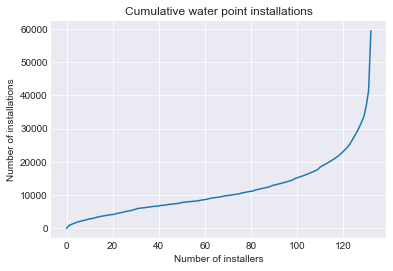

In [41]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
ax = plt.plot(cum_installers)
plt.xlabel('Number of installers')
plt.ylabel('Number of installations')
plt.title('Cumulative water point installations')
plt.savefig('cum_installers.png')

Looks reasonable to have a category of one_off if you installed only one water point.

In [42]:
one_offs = []
names = df['installer'].value_counts().index
for name in names:
    if df['installer'].value_counts()[name] == 1:
        one_offs.append(name)
len(one_offs)
print(one_offs[:10])

['MTAMBO', 'salamu kita', 'Dina', 'joery magabe', 'EMANDA BUILDERS', 'Government/TCRS', 'mzee mabena', 'Chuo', 'Others', 'MAISHULE']


In [43]:
def is_one_off(name):
    if name in one_offs:
        return 'one_off'
    else: 
        return name

df['installer'] = df['installer'].apply(is_one_off)
df['installer'].value_counts()

DW                           18015
unknown                       4475
Government                    3179
Community                     1675
DANIDA                        1604
Hesawa                        1382
RWE                           1206
KKKT                          1187
Council                       1169
Fin Water                      975
one_off                        865
World Vision                   714
TCRS                           707
RC church                      635
CES                            610
TASAF                          512
Village Govt                   511
TWE                            439
LGA                            408
WEDECO                         405
NORAD                          396
Gover                          383
UNICEF                         379
Japan Government               358
WORLD BANK                     358
OXFAM                          330
AMREF                          329
WU                             301
Dmdd                

Now there are 777 installers, down from 2145, Could also do for installed two pumps.

## Bins for population

Makes it easier for decision tree, and more logical

Do population next

In [44]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [45]:
# good 'category' bins look like 0, 1, 2-20, 20-30, 30-50, 50-100, 100-200, 200-300, 300-500, 500-1000, > 1000
# can do that after. Method will be create a category with a string name

In [46]:
# function to create bins for population variable
def popn_bins(population):
    if population == 0:
        return '0'
    elif population == 1:
        return '1'
    elif 2 <= population <  20:
        return '20'
    elif 20 <= population <  30:
        return '30'
    elif 30 <= population <  50:
        return '50'
    elif 50 <= population <  100:
        return '100'
    elif 100 <= population <  200:
        return '100'
    elif 200 <= population <  300:
        return '100'
    elif 300 <= population <  500:
        return '500'
    elif 500 <= population <  1000:
        return '1000'
    else:
        return '1000+'

# for item in df.population:
#     print(item, type(item))
# run function on df
df.population = df.population.apply(popn_bins)

In [47]:
df['population'].value_counts()

0        21381
100      16391
1         7025
500       5741
1000      3947
50        1829
1000+     1690
30         804
20         592
Name: population, dtype: int64

## Fix gps_height

Find number of zeros in gps_height. Zero means no info.

In [48]:
df['gps_height'].value_counts()[0]

20438

Huge number of gps_heights are zero, Can fix with a nearest neighbour (Euclidian lat/long) from 1000 random samples, then repeat many times.

In [49]:
# need helper in dict to find key of maximum value, used in gps_helper
def find_dict_max(dict_):
    for keys, values in dict_.items():
        if values == max(dict_.values()):
            return keys

In [50]:
def gps_helper(df):
    """ 
    takes average height of Euclidian 3 nearest neighbours by distance (lat/long)
    trying every short cut to optimise
    Not even finding square root of error terms to save a calculation
    Notice that you still need to return a df_gps_list for later incorporation
    (Setting just not working by any means)
    
    This version works with putting new value directly into base case df
    
    """
    for i in df.index:
        # v just progess checking during running of function
        if i % 100 == 0:
            pass
        
        if df.iat[i, 3] != 0: 
           pass
            
        else: 
            # neighbours = {index: distance, ...} - are dummy keys / values that get replaced
            neighbours = {999999: 9999, 999998: 9998, 999997: 9997}
            for j in df.index: 
                if j != i: 
                    euclidian_dist = ((df.iat[i, 6] - df.iat[j, 6])**2 + (df.iat[i, 5] - df.iat[j, 5])**2)
    
                    if euclidian_dist < max(neighbours.values()):
                        # if yes, need to remove max distance so far and update  with smaller distance
                        neighbours.pop(find_dict_max(neighbours))
                        neighbours.update({j: euclidian_dist})
 
            heights = []
            for k in neighbours.keys():
                heights.append(df['gps_height'][k])
            if len(heights) != 0:
                df.iat[i, 3] = sum(heights) / len(heights)
            else: 
                df.iat[i, 3] = 0

    zero_count = 0
    for m in range(df.shape[0]):
        if df.iat[m, 3] == 0:
            zero_count += 1

    print("number of zero heights is: {}".format(zero_count))
    return df

In [51]:
import time
# keep shuffling the df and redo function for for 1000 entries
print("initial zeros", df['gps_height'].value_counts()[0])
iters = []
start = time.time()
for i in range(60):
    df = df.reindex(np.random.permutation(df.index))
    df = df.reset_index(drop=True)
    df[:1000] = gps_helper(df[:1000])
    iters.append(i)
    print(i)

stop = time.time()
print("iterations", max(iters))
print(stop - start, "s")
print("remaining zeros", df['gps_height'].value_counts()[0])

initial zeros 20438
number of zero heights is: 330
0
number of zero heights is: 294
1
number of zero heights is: 266
2
number of zero heights is: 274
3
number of zero heights is: 285
4
number of zero heights is: 301
5
number of zero heights is: 329
6
number of zero heights is: 299
7
number of zero heights is: 296
8
number of zero heights is: 286
9
number of zero heights is: 271
10
number of zero heights is: 289
11
number of zero heights is: 308
12
number of zero heights is: 277
13
number of zero heights is: 270
14
number of zero heights is: 302
15
number of zero heights is: 244
16
number of zero heights is: 296
17
number of zero heights is: 278
18
number of zero heights is: 254
19
number of zero heights is: 282
20
number of zero heights is: 284
21
number of zero heights is: 229
22
number of zero heights is: 261
23
number of zero heights is: 283
24
number of zero heights is: 255
25
number of zero heights is: 255
26
number of zero heights is: 258
27
number of zero heights is: 227
28
numb

Done: six times.

## Fix construction_year

In [52]:
df['construction_year'].value_counts()[0]

20709

Huge number of construction_year are zero, Can fix with a 'match on all 4 of these relevant variables' from 1000 random samples, then repeat many times.

In [53]:
# Redo for construction_year
def construction_helper(df):
    """ 
    BASED ON gps_helper function
    INPUT is the whole dataframe, so that you can easily traverse rows and columns
    OUTPUT is whole df that has the new construction_year
    IDEA: if construction_year is zero, iterate df to find matches for all chosen comparison variables.
    If all match, add the iterative row's year to a list and take average of list at end. Put that into 
    output df's entry.
   
    """
    for i in df.index:
        
        if df.iat[i, 13] != 0: 
           pass
            
        else: 
            # initialise list that you will put matching years into
            matching_years = []
            for j in df.index: 
                # Many construction_year = 0, so not using these
                if (j != i) and (df.iat[j, 13] != 0):
                    # using a counter for readability
                    counter = 0
                    if df.iat[i, 4] == df.iat[j, 4]:
                        counter += 1
                    if df.iat[i, 11] == df.iat[j, 11]:
                        counter += 1 
                    if df.iat[i, 14] == df.iat[j, 14]:
                        counter += 1 
                    if df.iat[i, -1] == df.iat[j, -1]:
                        counter += 1    
                    # check if all items match
                    if counter == 4:
                        # if yes, add to matching_years
                        matching_years.append(df.iat[j, 13])
                    else:
                        pass
                    
            # now need to get average year of the matches   
            if len(matching_years) != 0:
                df.iat[i, 13] = round(sum(matching_years)/len(matching_years))
            else: 
                df.iat[i, 13] = 0

    zero_count = 0
    for m in df.index:
        if df.iat[m, 13] == 0:
            zero_count += 1
    
    print("final number of zero years is: {}".format(zero_count))
    return df

In [54]:
df['construction_year'].value_counts()[0]

20709

In [55]:
print("initial zeros", df['construction_year'].value_counts()[0])
iters = []
start = time.time()
for i in range(60):
    df = df.reindex(np.random.permutation(df.index))
    df = df.reset_index(drop=True)
    df[:1000] = construction_helper(df[:1000])
    iters.append(i)
    print(i)

stop = time.time()
print("iterations", max(iters))
print(stop - start, "s")
print("remaining zeros", df['construction_year'].value_counts()[0])

initial zeros 20709
final number of zero years is: 204
0
final number of zero years is: 212
1
final number of zero years is: 212
2
final number of zero years is: 241
3
final number of zero years is: 224
4
final number of zero years is: 214
5
final number of zero years is: 211
6
final number of zero years is: 221
7
final number of zero years is: 196
8
final number of zero years is: 206
9
final number of zero years is: 198
10
final number of zero years is: 187
11
final number of zero years is: 180
12


KeyboardInterrupt: 

Done: six times.

In [56]:
# save to a file
# df.to_csv('/Users/RAhmed/data store/Wesleyan_Capstone/gps_and_construction201808292120.csv', index=False)

(59400, 23)

## Fix date_recorded and create wpt_year

In [57]:
type(df['date_recorded'][1])

str

In [58]:
df.iat[0, 1]

'01/02/13'

date_recorded is a string. Need to convert to a number so can be used for composite variables

In [59]:
# function to convert string to numericl for date in this format '01/02/13'
def year_convert(date_recorded):
    """
    takes custom string (e.g. '18/03/13') and converts to a float
    is not super accurate as assumes all months have 31 days
    
    """
    year = float(date_recorded[6:8])
    if year > 30:
        year += 1900
    else: 
        year += 2000
    month = float(date_recorded[3:5])
    day = float(date_recorded[:2])
    
    return year + ((month - 1) / 12) + (day / (31*12)) 

year_convert('18/03/13')

2013.215053763441

In [60]:
# convert df['date_recorded']
df['date_recorded'] = df['date_recorded'].apply(year_convert)
df.head()

,id,date_recorded,season_recorded,gps_height,installer,longitude,latitude,basin,region_code,population,...,construction_year,extraction_type_group,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type_group,status_group
0,13375,2013.086022,short_dry,343,Fin Water,39.523356,-10.587881,Ruvuma / Southern Coast,9,1,...,1982,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe,non functional
1,61207,2011.204301,long_rainy,6,Government,35.837979,-6.501625,Rufiji,1,0,...,2007,submersible,user-group,per bucket,soft,insufficient,borehole,groundwater,communal standpipe,functional
2,45311,2013.172043,long_rainy,-36,DW,39.499206,-8.964689,Ruvuma / Southern Coast,80,100,...,2003,other,user-group,never pay,salty,enough,shallow well,groundwater,other,non functional
3,5191,2011.180108,long_rainy,1405,DANIDA,35.542541,-7.716791,Rufiji,11,1000,...,1985,gravity,user-group,monthly,soft,enough,spring,groundwater,communal standpipe,functional
4,67919,2011.209677,long_rainy,172,WU,38.364222,-6.636850,Wami / Ruvu,6,50,...,2010,submersible,commercial,per bucket,soft,enough,river/lake,surface,communal standpipe,functional


In [61]:
# need another helper function in the case that construction_year is still zero
# the reason is that to get wpt_age where construction_year == 0, we need to make that the
# same as date_recorded. 
def check_not_zero(df):
    """ 
    passes if not zero
    else sets to recorded date set as a float
    """
    for i in df.index:
        if df.iat[df.index[i], 13] != 0: 
           pass
            
        else: 
            df.iat[i, 13] = df.iat[i, 1]
                       
    return df

In [62]:
df_wpt_age = df.date_recorded - df.construction_year
df.insert(13,'wpt_age', df_wpt_age )

In [ ]:
df.columns

In [29]:
# save to a file
# df.to_csv('/Users/RAhmed/data store/Wesleyan_Capstone/wpt_year201808292140.csv', index=False)
df = pd.read_csv('/Users/RAhmed/data store/Wesleyan_Capstone/wpt_year201808292140.csv')
df.shape

(59400, 24)

## Further data visualisation

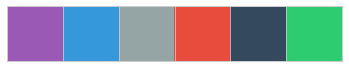

In [30]:
# seaborn presets
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
sns.set_style("whitegrid")

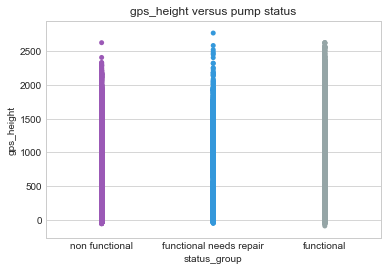

In [74]:
ax = sns.stripplot(x="status_group", y="gps_height", data=df, jitter=False, order=[ "non functional", "functional needs repair", "functional"])
plt.title('gps_height versus pump status')
ax.figure.savefig('ax_gps_height', dpi = 1000)

Text(0.5,1,'season_recorded versus pump status')

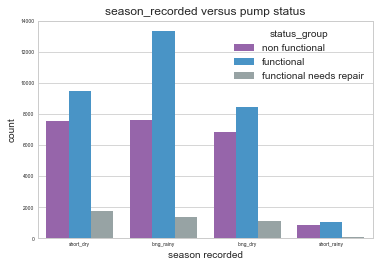

In [73]:
ax = sns.countplot(x='season_recorded', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('season recorded',fontsize=10)
plt.title('season_recorded versus pump status')
# ax.figure.savefig('ax_season_recorded.png', dpi = 1000)

Text(0.5,1,'geological water basin versus pump status')

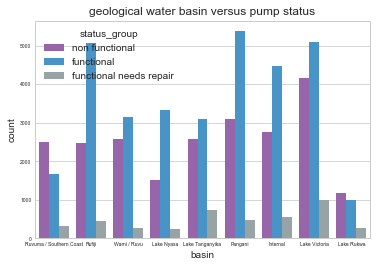

In [72]:
ax = sns.countplot(x='basin', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('basin',fontsize=10)
plt.title('geological water basin versus pump status')
# ax.figure.savefig('ax_basin.png', dpi = 1000)

Text(0.5,1,'administrative region versus pump status')

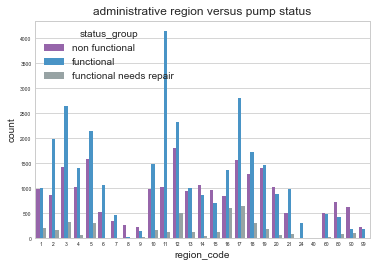

In [71]:
ax = sns.countplot(x='region_code', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('region_code',fontsize=10)
plt.title('administrative region versus pump status')
# ax.figure.savefig('ax_region_code.png', dpi = 1000)

**region check of independence**<br>
If there were no relationship between regions and status_group, the distribution of status_group very similar whatever the region.In other words the NULL HYPOTHESIS is that there is no relationship between region and status_group.

In [38]:
# check independence
import scipy.stats
# contingency table of observed counts
ct1=pd.crosstab(df['region_code'], df['status_group'])
ct1.head()

status_group,functional,functional needs repair,non functional
region_code,,,
1,1009,209,983
2,1978,174,872
3,2640,322,1417
4,1408,73,1032
5,2147,300,1593


In [41]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
cs1

chi-square value, p value, expected counts


(5157.385233360806,
 0.0,
 52,
 array([[1.19532086e+03, 1.59961566e+02, 8.45717576e+02],
        [1.64227636e+03, 2.19774545e+02, 1.16194909e+03],
        [2.37815086e+03, 3.18251566e+02, 1.68259758e+03],
        [1.36476207e+03, 1.82636717e+02, 9.65601212e+02],
        [2.19404646e+03, 2.93614141e+02, 1.55233939e+03],
        [8.73817020e+02, 1.16936919e+02, 6.18246061e+02],
        [4.37180051e+02, 5.85047980e+01, 3.09315152e+02],
        [1.62924242e+02, 2.18030303e+01, 1.15272727e+02],
        [2.11801515e+02, 2.83439394e+01, 1.49854545e+02],
        [1.43373333e+03, 1.91866667e+02, 1.01440000e+03],
        [2.87832828e+03, 3.85186869e+02, 2.03648485e+03],
        [2.51935187e+03, 3.37147525e+02, 1.78250061e+03],
        [1.13666813e+03, 1.52112475e+02, 8.04219394e+02],
        [1.07475692e+03, 1.43827323e+02, 7.60415758e+02],
        [9.81890101e+02, 1.31399596e+02, 6.94710303e+02],
        [1.52931556e+03, 2.04657778e+02, 1.08202667e+03],
        [2.72137793e+03, 3.64183283e+02, 

The p-value above is 0.0, which is less than 0.05. We say the result is significant enough to reject the null hypothesis.

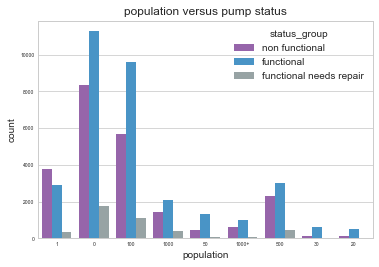

In [58]:
ax = sns.countplot(x='population', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('population',fontsize=10)
plt.title('population versus pump status')
ax.figure.savefig('ax_population.png', dpi = 1000)

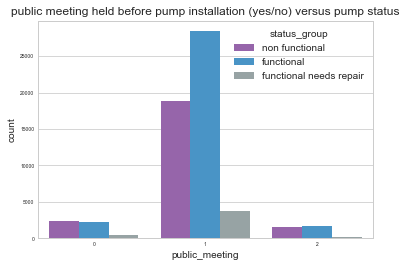

In [59]:
ax = sns.countplot(x='public_meeting', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('public_meeting',fontsize=10)
plt.title('public meeting held before pump installation (yes/no) versus pump status')
ax.figure.savefig('ax_public_meeting.png', dpi = 1000)

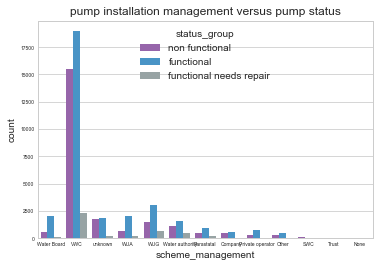

In [65]:
ax = sns.countplot(x='scheme_management', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('scheme_management',fontsize=10)
plt.title('pump installation management versus pump status')
ax.figure.savefig('ax_scheme_management.png', dpi = 1000)

**scheme_management** check of independence
If there were no relationship between scheme_management and status_group, the distribution of status_group very similar whatever the scheme_management.In other words the NULL HYPOTHESIS is that there is no relationship between scheme_management and status_group.

In [48]:
# check independence
import scipy.stats
# contingency table of observed counts
ct1=pd.crosstab(df['scheme_management'], df['status_group'])
ct1.head()

status_group,functional,functional needs repair,non functional
scheme_management,,,
Company,534,37,490
None,1,0,0
Other,458,22,286
Parastatal,966,202,512
Private operator,729,23,311


In [49]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
cs1

chi-square value, p value, expected counts


(1991.065634468276,
 0.0,
 24,
 array([[5.76208737e+02, 7.71100505e+01, 4.07681212e+02],
        [5.43080808e-01, 7.26767677e-02, 3.84242424e-01],
        [4.15999899e+02, 5.56704040e+01, 2.94329697e+02],
        [9.12375758e+02, 1.22096970e+02, 6.45527273e+02],
        [5.77294899e+02, 7.72554040e+01, 4.08449697e+02],
        [5.26788384e+01, 7.04964646e+00, 3.72715152e+01],
        [3.91018182e+01, 5.23272727e+00, 2.76654545e+01],
        [1.99815722e+04, 2.67399631e+03, 1.41374315e+04],
        [1.56570197e+03, 2.09527121e+02, 1.10777091e+03],
        [2.82727869e+03, 3.78355253e+02, 2.00036606e+03],
        [1.49238606e+03, 1.99715758e+02, 1.05589818e+03],
        [1.71233379e+03, 2.29149848e+02, 1.21151636e+03],
        [2.10552429e+03, 2.81767828e+02, 1.48970788e+03]]))

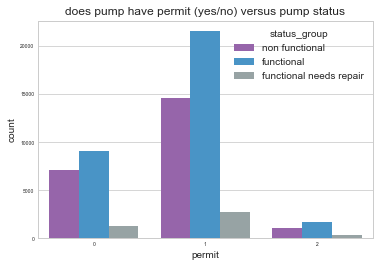

In [61]:
ax = sns.countplot(x='permit', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('permit',fontsize=10)
plt.title('does pump have permit (yes/no) versus pump status')
ax.figure.savefig('ax_permit.png', dpi = 1000)

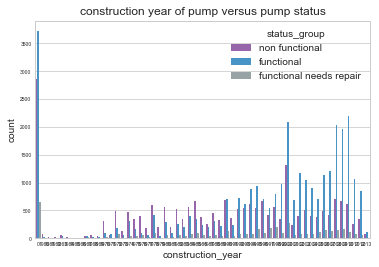

In [62]:
ax = sns.countplot(x='construction_year', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('construction_year',fontsize=10)
plt.title('construction year of pump versus pump status')
ax.figure.savefig('ax_construction_year.png', dpi = 1000)

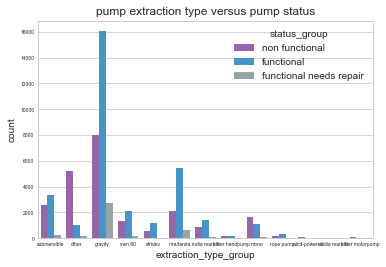

In [63]:
ax = sns.countplot(x='extraction_type_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('extraction_type_group',fontsize=10)
plt.title('pump extraction type versus pump status')
ax.figure.savefig('ax_extraction_type_group.png', dpi = 1000)

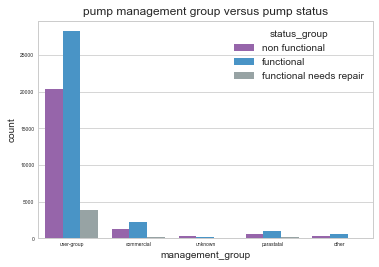

In [64]:
ax = sns.countplot(x='management_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('management_group',fontsize=10)
plt.title('pump management group versus pump status')
ax.figure.savefig('ax_management_group.png', dpi = 1000)

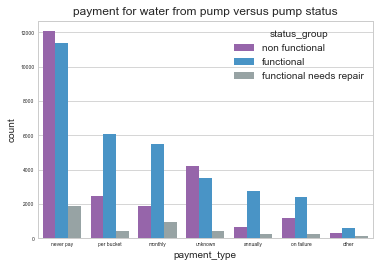

In [66]:
ax = sns.countplot(x='payment_type', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('payment_type',fontsize=10)
plt.title('payment for water from pump versus pump status')
ax.figure.savefig('ax_payment_type.png', dpi = 1000)

**payment_type** check of independence If there were no relationship between payment and status_group, the distribution of status_group very similar whatever the payment_type.In other words the NULL HYPOTHESIS is that there is no relationship between payment_type and status_group.

In [44]:
# check independence
import scipy.stats
# contingency table of observed counts
ct1=pd.crosstab(df['payment_type'], df['status_group'])
ct1.head()

status_group,functional,functional needs repair,non functional
payment_type,,,
annually,2740,247,655
monthly,5482,927,1891
never pay,11379,1907,12062
on failure,2429,277,1208
other,611,118,325


In [45]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
cs1

chi-square value, p value, expected counts


(3965.619403974787,
 0.0,
 12,
 array([[ 1977.90030303,   264.68878788,  1399.41090909],
        [ 4507.57070707,   603.21717172,  3189.21212121],
        [13766.01232323,  1842.21070707,  9739.7769697 ],
        [ 2125.61828283,   284.45686869,  1503.92484848],
        [  572.40717172,    76.60131313,   404.99151515],
        [ 4879.58106061,   653.00075758,  3452.41818182],
        [ 4429.91015152,   592.82439394,  3134.26545455]]))

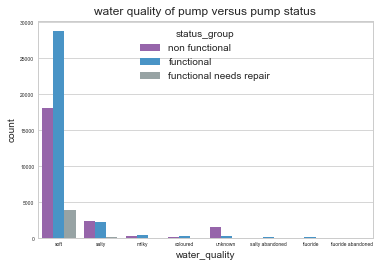

In [67]:
ax = sns.countplot(x='water_quality', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('water_quality',fontsize=10)
plt.title('water quality of pump versus pump status')
ax.figure.savefig('ax_water_quality.png', dpi = 1000)

**water_quality** check of independence If there were no relationship between water_quality and status_group, the distribution of status_group very similar whatever the water_quality.In other words the NULL HYPOTHESIS is that there is no relationship between water_quality and status_group.

In [46]:
# check independence
import scipy.stats
# contingency table of observed counts
ct1=pd.crosstab(df['water_quality'], df['status_group'])
ct1.head()

status_group,functional,functional needs repair,non functional
water_quality,,,
coloured,246,54,190
fluoride,151,13,36
fluoride abandoned,6,0,11
milky,438,14,352
salty,2220,225,2411


In [47]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
cs1

chi-square value, p value, expected counts


(2277.37334278519,
 0.0,
 14,
 array([[2.66109596e+02, 3.56116162e+01, 1.88278788e+02],
        [1.08616162e+02, 1.45353535e+01, 7.68484848e+01],
        [9.23237374e+00, 1.23550505e+00, 6.53212121e+00],
        [4.36636970e+02, 5.84321212e+01, 3.08930909e+02],
        [2.63720040e+03, 3.52918384e+02, 1.86588121e+03],
        [1.84104394e+02, 2.46374242e+01, 1.30258182e+02],
        [2.75982805e+04, 3.69328798e+03, 1.95264315e+04],
        [1.01881960e+03, 1.36341616e+02, 7.20838788e+02]]))

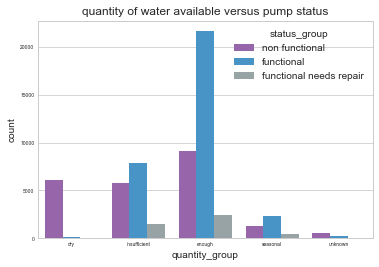

In [68]:
ax = sns.countplot(x='quantity_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('quantity_group',fontsize=10)
plt.title('quantity of water available versus pump status')
ax.figure.savefig('ax_quantity_group.png', dpi = 1000)

**quantity_group** check of independence If there were no relationship between quantity_group and status_group, the distribution of quantity_group very similar whatever the payment_type.In other words the NULL HYPOTHESIS is that there is no relationship between quantity_group and status_group.

In [50]:
# check independence
import scipy.stats
# contingency table of observed counts
ct1=pd.crosstab(df['quantity_group'], df['status_group'])
ct1.head()

status_group,functional,functional needs repair,non functional
quantity_group,,,
dry,157,37,6052
enough,21648,2400,9138
insufficient,7916,1450,5763
seasonal,2325,416,1309
unknown,213,14,562


In [51]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
cs1

chi-square value, p value, expected counts


(11360.767895852761,
 0.0,
 8,
 array([[ 3392.08272727,   453.93909091,  2399.97818182],
        [18022.67969697,  2411.85121212, 12751.46909091],
        [ 8216.26954545,  1099.52681818,  5813.20363636],
        [ 2199.47727273,   294.34090909,  1556.18181818],
        [  428.49075758,    57.3419697 ,   303.16727273]]))

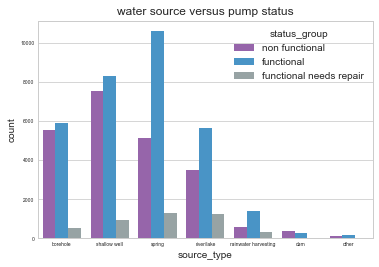

In [69]:
ax = sns.countplot(x='source_type', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('source_type',fontsize=10)
plt.title('water source versus pump status')
ax.figure.savefig('ax_source_type.png', dpi = 1000)

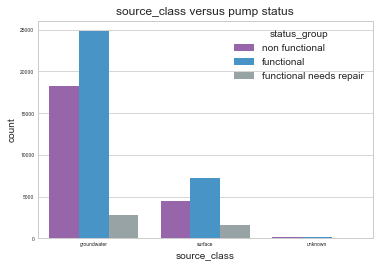

In [103]:
ax = sns.countplot(x='source_class', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('source_class',fontsize=10)
plt.title('source_class versus pump status')
ax.figure.savefig('ax_source_class.png', dpi = 1000)

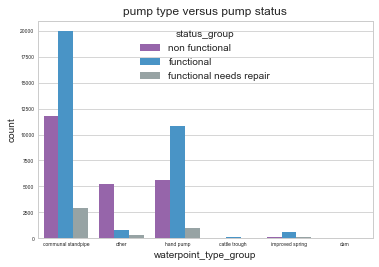

In [70]:
ax = sns.countplot(x='waterpoint_type_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('waterpoint_type_group',fontsize=10)
plt.title('pump type versus pump status')
ax.figure.savefig('ax_waterpoint_type_group.png', dpi = 1000)

**wpt_type_group** check of independence
If there were no relationship between regions and status_group, the distribution of status_group very similar whatever the region.In other words the NULL HYPOTHESIS is that there is no relationship between region and status_group.

In [42]:
# check independence
import scipy.stats
# contingency table of observed counts
ct1=pd.crosstab(df['waterpoint_type_group'], df['status_group'])
ct1.head()

status_group,functional,functional needs repair,non functional
waterpoint_type_group,,,
cattle trough,84,2,30
communal standpipe,19961,2908,11756
dam,6,0,1
hand pump,10805,1029,5654
improved spring,563,85,136


In [43]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
cs1

chi-square value, p value, expected counts


(6114.774218320656,
 0.0,
 10,
 array([[6.29973737e+01, 8.43050505e+00, 4.45721212e+01],
        [1.88041730e+04, 2.51643308e+03, 1.33043939e+04],
        [3.80156566e+00, 5.08737374e-01, 2.68969697e+00],
        [9.49739717e+03, 1.27097131e+03, 6.71963152e+03],
        [4.25775354e+02, 5.69785859e+01, 3.01246061e+02],
        [3.46485556e+03, 4.63677778e+02, 2.45146667e+03]]))

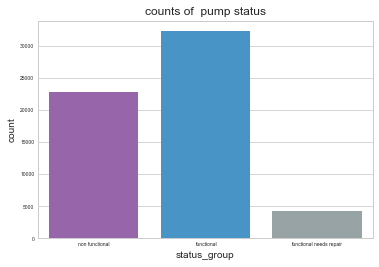

In [105]:
ax = sns.countplot(x='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('status_group',fontsize=10)
plt.title('counts of  pump status')
ax.figure.savefig('ax_status_group.png', dpi = 1000)

In [146]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Violin plots
For good violin plots for wpt_age and construction_year, see archived ones. These were done before the above processing that gives violin lot weight to variable equals zero.

## Tanzania - data analysis

In [150]:
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

Sklearn's decision trees and random forests need categorical data changed into integers. See, e.g,: https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

Booleans were already tackled in the **Get rid of NaNs** section with a home-made function.

The non-boolean categories will be converted with sklearn's LabelEncoder

In [154]:
df.columns

Index(['id', 'date_recorded', 'season_recorded', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region_code', 'population',
       'public_meeting', 'scheme_management', 'permit', 'wpt_age',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment_type', 'water_quality', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [156]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

# these will be encoded by sklearn LabelEncoder
non_bool_categoric = ['id', 'season_recorded', 'installer', 'basin', 'region_code', 
                      'population', 'scheme_management', 'wpt_age','extraction_type_group', 
                      'management_group','payment_type', 'water_quality', 'quantity_group', 
                      'source_type','waterpoint_type_group', 'status_group']

for nbc in nonbool_cat_vars:
    class_le = LabelEncoder()
    df[nbc] = class_le.fit_transform(df[nbc].values)
    print(df[nbc][:5])

0    10
1     7
2    12
3     7
4     8
Name: scheme_management, dtype: int64
0    1
1    0
2    2
3    3
4    7
Name: population, dtype: int64
0    7
1    6
2    7
3    6
4    8
Name: basin, dtype: int64
0    2
1    0
2    2
3    0
4    0
Name: status_group, dtype: int64
0    0
1    2
2    1
3    1
4    1
Name: quantity_group, dtype: int64
0    197
1    223
2    157
3    132
4    736
Name: installer, dtype: int64
0     8
1     0
2    24
3    10
4     5
Name: region_code, dtype: int64
0    2
1    5
2    2
3    1
4    5
Name: payment_type, dtype: int64
0    10
1    10
2     6
3     1
4    10
Name: extraction_type_group, dtype: int64
0    2
1    1
2    1
3    1
4    1
Name: season_recorded, dtype: int64
0    0
1    0
2    5
3    6
4    4
Name: source_type, dtype: int64
0    0
1    0
2    0
3    0
4    1
Name: source_class, dtype: int64
0    1
1    1
2    5
3    1
4    1
Name: waterpoint_type_group, dtype: int64
0    6
1    6
2    4
3    6
4    6
Name: water_quality, dtype: int64
0    4
1

In [157]:
chosen_predictors = ['season_recorded', 'gps_height', 'installer', 'basin', 'region_code', 'population',
                     'public_meeting', 'scheme_management', 'permit', 'wpt_age','construction_year', 
                     'extraction_type_group', 'management_group', 'payment_type', 'water_quality', 
                     'quantity_group', 'source_type', 'waterpoint_type_group'
                    ]

predictors = df[chosen_predictors]
targets = df['status_group']

# train/test split
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

print("pred_train.shape:", pred_train.shape)
print("pred_test.shape:", pred_test.shape)
print("tar_train.shape:", tar_train.shape)
print("tar_test.shape:", tar_test.shape)

pred_train.shape: (47520, 18)
pred_test.shape: (11880, 18)
tar_train.shape: (47520,)
tar_test.shape: (11880,)


Build a classifier model with a decision tree, on train set

In [158]:
# Build model on training data; initiate classifier from sklearn, then fit it with the training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

# predict for the test values and create confusion matrix
predictions=classifier.predict(pred_test)
print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print("Accuracy score:")
print(sklearn.metrics.accuracy_score(tar_test, predictions))

Confusion matrix:
[[5116  411  897]
 [ 337  356  186]
 [ 923  172 3482]]
Accuracy score:
0.7537037037037037


Trying again, to play with parameters, experiment, etc.

In [159]:
# Playing with hyper-parameters. Also have varied the wording of the code from that in the MOOC. 
# (Just to check all in order with exceptionally high result.)
# train/test split
from sklearn.utils import shuffle
df = shuffle(df)
X_train, X_test, y_train, y_test = train_test_split(predictors[:], targets[:], test_size=.2)

# Build model on training data; initiate classifier from sklearn, then fit it with the training data
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7490740740740741

For confusion matrix, N.B. that:

functional = 0

functional_needs_repair = 1

non-functional = 2

In [160]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Pred functional', 'Predicted func_need_repair', 'Predicted non_func'],
    index=['True functional', 'True func_need_repair', 'True non_func']
)

,Pred functional,Predicted func_need_repair,Predicted non_func
True functional,5110,368,909
True func_need_repair,383,342,162
True non_func,991,168,3447


In [161]:
# reprint for convenience
accuracy_score(y_test, y_predict)

0.7490740740740741

Key ingredient: see which features are most important

In [162]:
importance = (dict(zip(X_train, model.feature_importances_)))
sorted_items = sorted(importance.items(), key = lambda x: x[1], reverse=True)
sorted_items

[('gps_height', 0.20986080880462965),
 ('wpt_age', 0.1597729522027112),
 ('quantity_group', 0.15923121242948865),
 ('waterpoint_type_group', 0.07940346418246488),
 ('installer', 0.05546931535618536),
 ('region_code', 0.044997376150274646),
 ('payment_type', 0.042367708918778266),
 ('population', 0.035359737300901375),
 ('construction_year', 0.03444676423619585),
 ('extraction_type_group', 0.0336102086526689),
 ('scheme_management', 0.027892953395838645),
 ('basin', 0.02604852825967338),
 ('source_type', 0.02573559508709787),
 ('water_quality', 0.01772373075322198),
 ('permit', 0.013689906872588356),
 ('season_recorded', 0.013406349617147007),
 ('public_meeting', 0.011965660197727955),
 ('management_group', 0.009017727582406043)]

## Visualise the Decision Tree

It turns out that visualising the decision tree is quite straight forward.

There are two things one can initially do: limit or not limit maximum depth as folling example:
model = DecisionTreeClassifier(max_depth=None)

As below, push the image out to a tree.dot file. Find it on your computer amd then cut and paste the code into a web viewer/converter. See, e.g.:
http://www.ilovefreesoftware.com/03/featured/free-online-dot-to-png-converter-websites.html https://dreampuf.github.io/GraphvizOnline/

Right-clicking the image in GraphvizOnline, I could save the png to desktop.

If you limit maximum depth, your decision tree may be small enough to fit on one page. Else, cut and paste a number of lines of code from the tree.dot file, making sure you finish as follows in the online converter, e.g.:

...
44 -> 54 ; 
}

If you do limit the max depth the tree will be different, of course, than a full tree.

In [166]:
from sklearn import tree

# visualise
tree.export_graphviz(model, out_file='tree.dot') 
# cut and paste the tree.dot file info into webgraphviz.com in a browser. 
# (You can paste as many layers of the tree as you want. See notes above.)

In [167]:
# save to a file
# df.to_csv('/Users/RAhmed/data store/Wesleyan_Capstone/all_numeric201808292240.csv', index=False)

In [ ]:
# To Do: Random Forest.

In [ ]:
# How could be improved: frequency encoding of variables.